In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/social-media-aspects/dataset.csv")

In [3]:
df.head(14)

,What is your age group?,What is your occupation?,Where do you live?,How many hours per day do you spend on social media?,How has social media affected your real-life relationships?,How frequently do you use email for communication?,Do you use LinkedIn for professional networking?,How often do you use WhatsApp for communication?,Which social media platforms do you use the most?,Do you feel that social media affects your mental health?
0,18-25,Student,Urban Area,More than 5 hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively"
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure
3,18-25,Student,Urban Area,3-5 hours,Worsened,Never,"No, never",Daily,Facebook,"Yes, negatively"
4,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"Yes, actively",Daily,Facebook,"Yes, negatively"
5,18-25,Student,Suburban Area,More than 5 hours,No Change,Rarely,"Yes, actively",Daily,LinkedIn,"Yes, positively"
6,18-25,Student,Rural Area,More than 5 hours,No Change,Rarely,Rarely,Daily,Instagram,Not sure
7,18-25,Student,Urban Area,3-5 hours,No Change,A few times a week,Rarely,Daily,Facebook,"Yes, positively"
8,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"No, never",Daily,Facebook,Not sure
9,18-25,Student,Urban Area,More than 5 hours,Worsened,Rarely,Rarely,A few times a week,Facebook,"Yes, negatively"


In [4]:
df.rename(columns={
    df.columns[0]: "Age_group",  # First column
    df.columns[1]: "Occupation",  # Second column
    df.columns[2]: "Location",  # Third column
    df.columns[3]: "Daily_social_media_hours",  # Fourth column
    df.columns[4]: "Relationship_impact",  # Fifth column
    df.columns[5]: "Email_frequency",  # Sixth column
    df.columns[6]: "LinkedIn_use",  # Seventh column
    df.columns[7]: "WhatsApp_frequency",  # Eighth column
    df.columns[8]: "Primary_social_platform",  # Ninth column
    df.columns[9]: "Mental_health_impact"  # Tenth column
}, inplace=True)

In [5]:
df.head(3)

,Age_group,Occupation,Location,Daily_social_media_hours,Relationship_impact,Email_frequency,LinkedIn_use,WhatsApp_frequency,Primary_social_platform,Mental_health_impact
0,18-25,Student,Urban Area,More than 5 hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively"
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure


In [6]:
df.columns

Index(['Age_group', 'Occupation', 'Location', 'Daily_social_media_hours',
       'Relationship_impact', 'Email_frequency', 'LinkedIn_use',
       'WhatsApp_frequency', 'Primary_social_platform',
       'Mental_health_impact'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age_group                 49 non-null     object
 1   Occupation                49 non-null     object
 2   Location                  49 non-null     object
 3   Daily_social_media_hours  49 non-null     object
 4   Relationship_impact       49 non-null     object
 5   Email_frequency           49 non-null     object
 6   LinkedIn_use              49 non-null     object
 7   WhatsApp_frequency        49 non-null     object
 8   Primary_social_platform   49 non-null     object
 9   Mental_health_impact      49 non-null     object
dtypes: object(10)
memory usage: 4.0+ KB


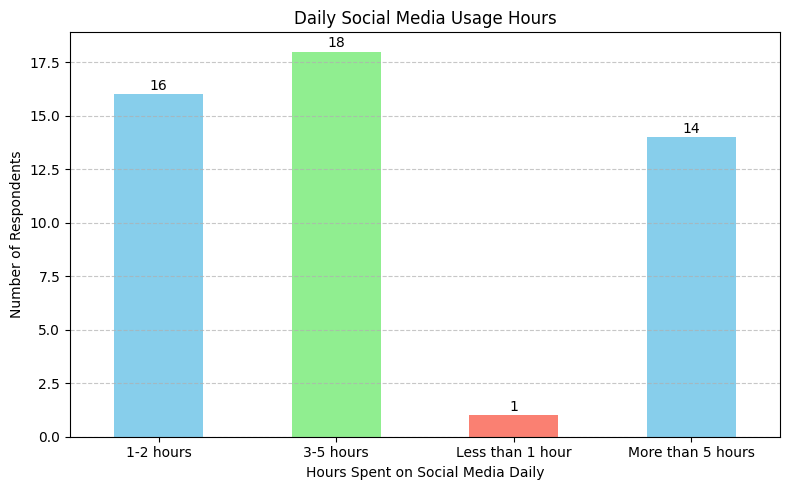

In [8]:
# Count the frequency of each category in 'Daily_social_media_hours'
counts = df['Daily_social_media_hours'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])  
plt.title('Daily Social Media Usage Hours')
plt.xlabel('Hours Spent on Social Media Daily')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

# Add counts on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v + 0.2, str(v), ha='center')  

plt.tight_layout() 
plt.show()

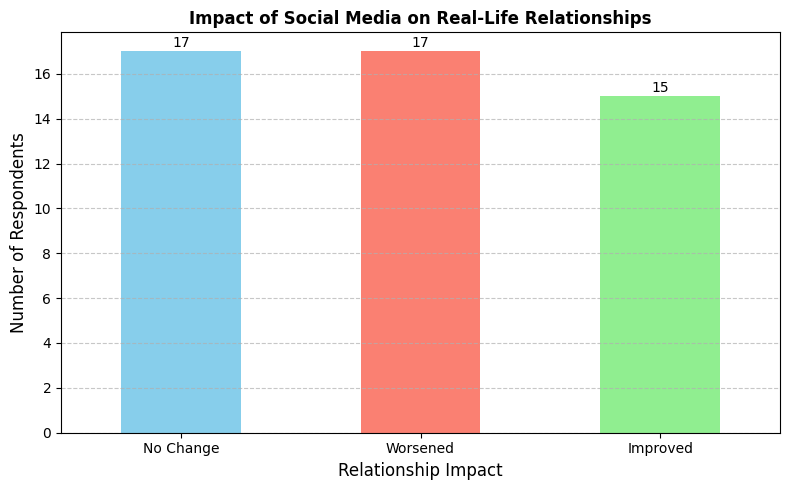

In [9]:
# How has social media affected your real-life relationships?
relationship_counts = df['Relationship_impact'].value_counts()


colors = {
    'Improved': 'lightgreen',
    'No Change': 'skyblue',
    'Worsened': 'salmon'
}

# Create the plot
plt.figure(figsize=(8, 5))
relationship_counts.plot(kind='bar', color=[colors.get(x, 'gray') for x in relationship_counts.index])

# Add labels and title
plt.title('Impact of Social Media on Real-Life Relationships', fontweight='bold')
plt.xlabel('Relationship Impact', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=0) 


for i, v in enumerate(relationship_counts):
    plt.text(i, v + 0.2, str(v), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
cross_tab = pd.crosstab(
    index=df['Daily_social_media_hours'], 
    columns=df['Relationship_impact'],
    margins=False
)


In [11]:
cross_tab

Relationship_impact,Improved,No Change,Worsened
Daily_social_media_hours,,,
1-2 hours,6,5,5
3-5 hours,3,8,7
Less than 1 hour,0,1,0
More than 5 hours,6,3,5


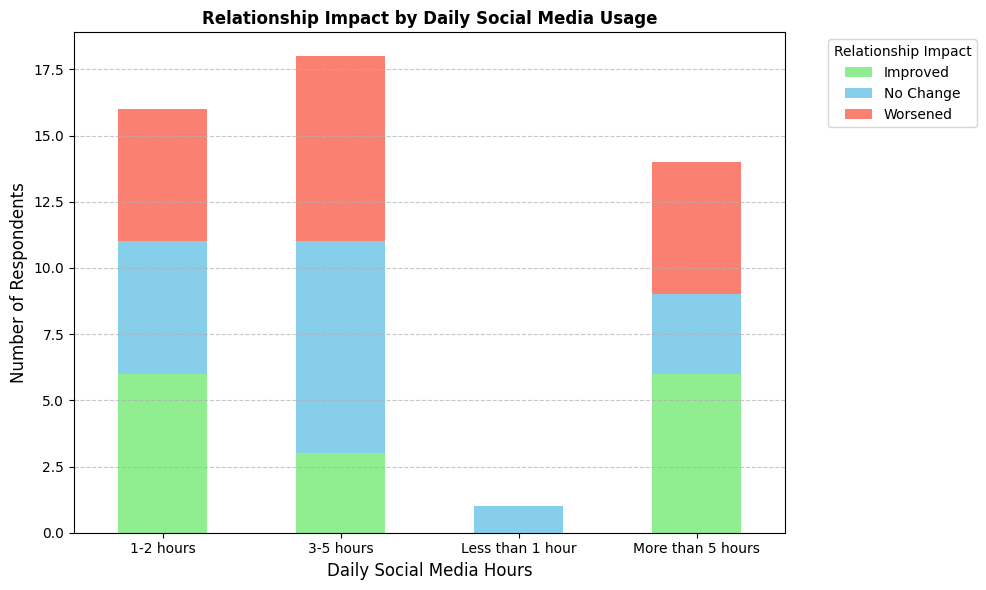

In [12]:
# Relationship Impact by Daily Social Media Usage
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), 
               color=['lightgreen', 'skyblue', 'salmon'])

plt.title('Relationship Impact by Daily Social Media Usage', fontweight='bold')
plt.xlabel('Daily Social Media Hours', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Relationship Impact', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
df['Daily_social_media_hours'] = df['Daily_social_media_hours'].str.strip()

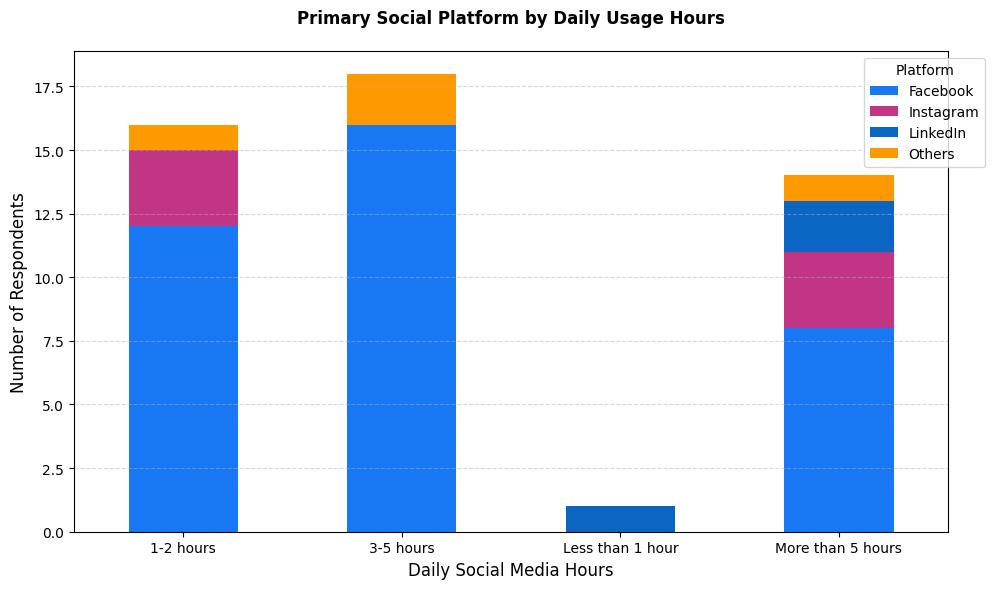

In [28]:
# Create cross-tabulation
platform_by_hours = pd.crosstab(
    index=df['Daily_social_media_hours'],
    columns=df['Primary_social_platform'],
    margins=False
)

# Plot
platform_by_hours.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6),
    color=['#1877F2', '#C13584', '#0A66C2', '#FF9900']  
)

plt.title('Primary Social Platform by Daily Usage Hours', fontweight='bold', pad=20)
plt.xlabel('Daily Social Media Hours', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

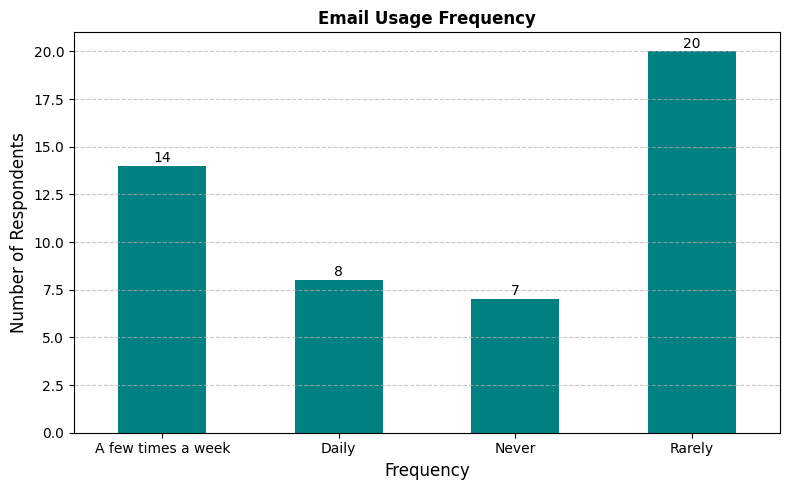

In [13]:
 # Email Usage Frequency
email_counts = df['Email_frequency'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
email_counts.plot(kind='bar', color='teal')


plt.title('Email Usage Frequency', fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=0)

for i, v in enumerate(email_counts):
    plt.text(i, v + 0.2, str(v), ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

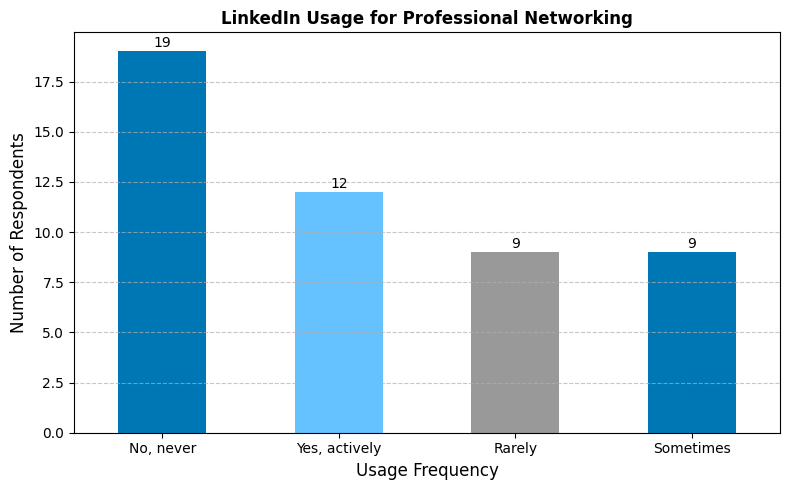

In [14]:
# LinkedIn Usage for Professional Networking
linkedin_counts = df['LinkedIn_use'].value_counts()
plt.figure(figsize=(8, 5))
linkedin_counts.plot(kind='bar', color=['#0077B5', '#66C2FF', '#999999'])  # LinkedIn's brand colors

plt.title('LinkedIn Usage for Professional Networking', fontweight='bold')
plt.xlabel('Usage Frequency', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=0)

# Add counts on bars
for i, v in enumerate(linkedin_counts):
    plt.text(i, v + 0.2, str(v), ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

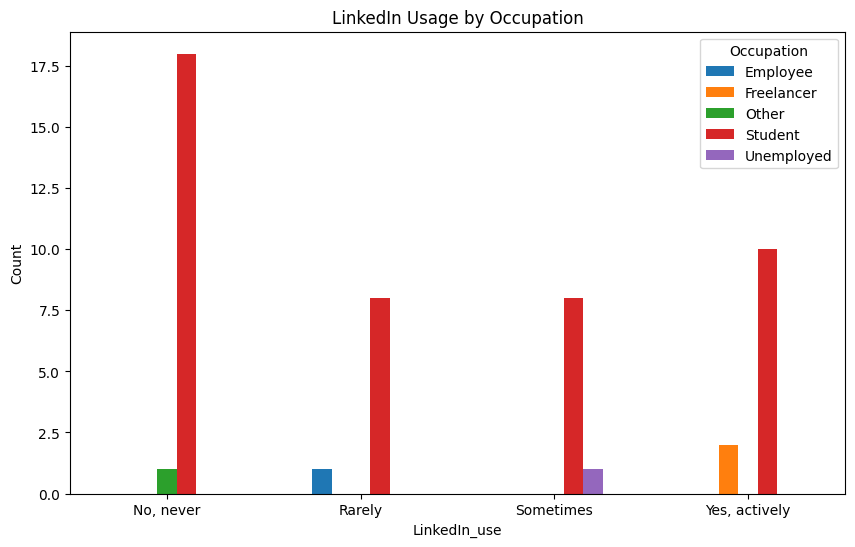

In [15]:
pd.crosstab(df['LinkedIn_use'], df['Occupation']).plot(kind='bar', figsize=(10, 6))
plt.title('LinkedIn Usage by Occupation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

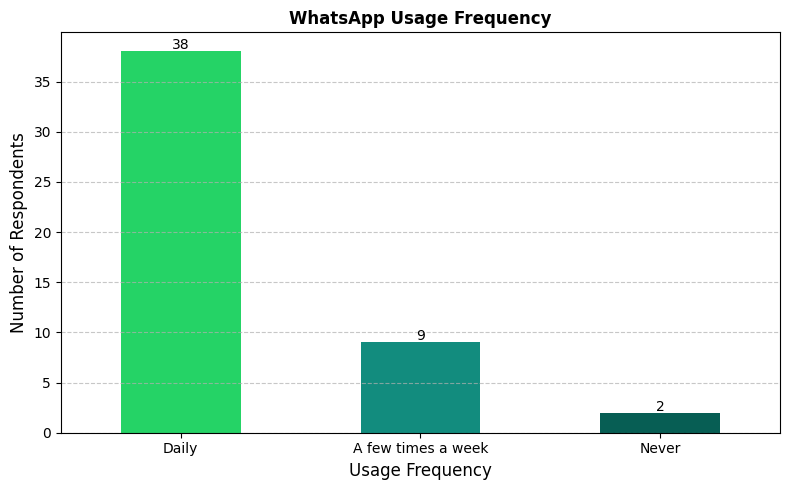

In [18]:
# whatsapp use
whatsapp_counts = df['WhatsApp_frequency'].value_counts()
plt.figure(figsize=(8, 5))
whatsapp_counts.plot(kind='bar', color=['#25D366', '#128C7E', '#075E54']) 
plt.title('WhatsApp Usage Frequency', fontweight='bold')
plt.xlabel('Usage Frequency', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=0)

# Add counts on bars
for i, v in enumerate(whatsapp_counts):
    plt.text(i, v + 0.2, str(v), ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
platform_counts = df['Primary_social_platform'].value_counts()

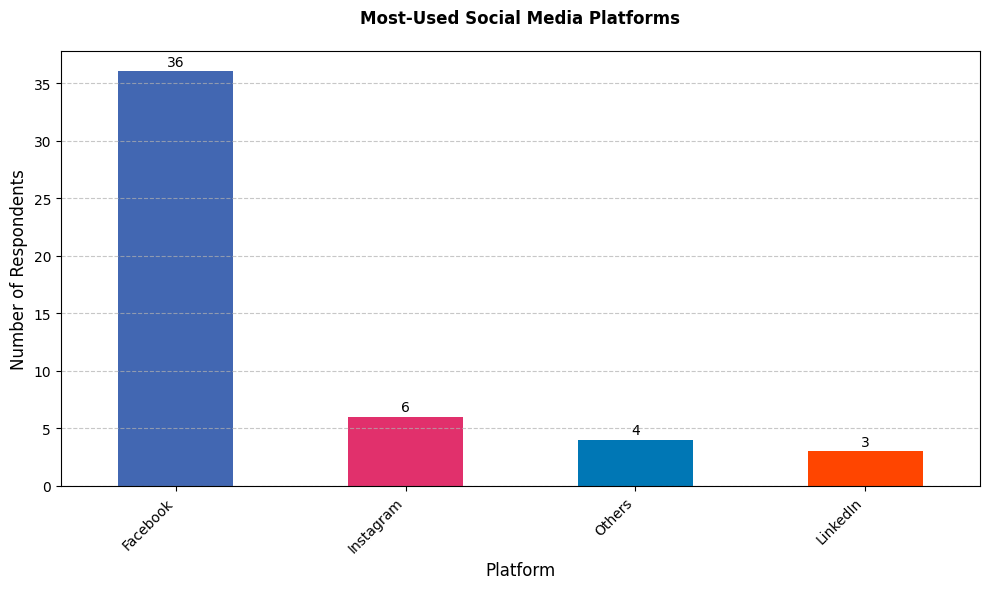

In [20]:
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar', color=['#4267B2', '#E1306C', '#0077B5', '#FF4500'])

plt.title('Most-Used Social Media Platforms', fontweight='bold', pad=20)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add counts on bars
for i, v in enumerate(platform_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
mental_health_counts = df['Mental_health_impact'].value_counts()

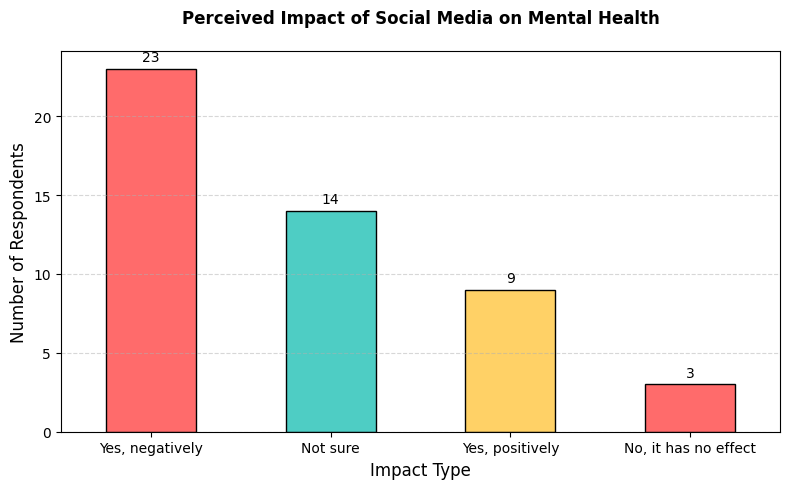

In [23]:
plt.figure(figsize=(8, 5))
mental_health_counts.plot(
    kind='bar', 
    color=['#FF6B6B', '#4ECDC4', '#FFD166'],
    edgecolor='black'
)

plt.title('Perceived Impact of Social Media on Mental Health', fontweight='bold', pad=20)
plt.xlabel('Impact Type', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=0)

# Add counts on bars
for i, v in enumerate(mental_health_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [24]:
df['Daily_social_media_hours'] = df['Daily_social_media_hours'].str.strip()

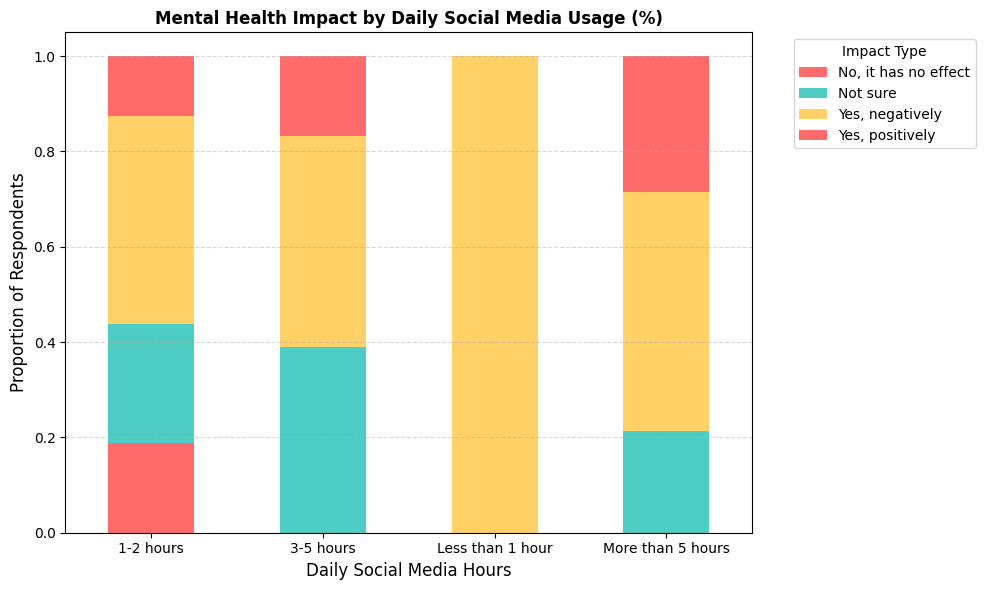

In [25]:
# Create a cross-tabulation
cross_tab = pd.crosstab(
    index=df['Daily_social_media_hours'], 
    columns=df['Mental_health_impact'],
    normalize='index'  
)

# Plot
cross_tab.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6),
    color=['#FF6B6B', '#4ECDC4', '#FFD166']  
)

plt.title('Mental Health Impact by Daily Social Media Usage (%)', fontweight='bold')
plt.xlabel('Daily Social Media Hours', fontsize=12)
plt.ylabel('Proportion of Respondents', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Impact Type', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()